## Convergence tests for LiFePO4

In [1]:
%load_ext aiida
%aiida

Loaded AiiDA DB environment - profile name: ucl.

In [2]:
lfp_structure = load_node('692cb240').inputs.structure

In [3]:
from aiida_user_addons.vworkflows.new_conv import VaspConvergenceWorkChain, ConvOptions
from aiida_user_addons.common.builder_updater import VaspRelaxUpdater, VaspConvUpdater
from aiida_user_addons.tools.dryrun import dryrun_relax_builder

from aiida_grouppathx import GroupPathX

from aiida.engine import submit

In [4]:
base = GroupPathX('lfp-demo')

In [5]:
config = {
    'code': 'vasp-6.3.0-std@young',
    'inputset': 'UCLRelaxSet',
    'overrides': {'encut': 520, 'magmom_mapping': {'Fe': 4.0, 'default': 0.6}, 'ldauu_mapping' : {'Fe': ['d', 4.0]}, 'kpar': 8, 'ncore': 5, 'symprec': 1e-8},
    'options':{
        'max_wallclock_seconds': 1200,
        'custom_scheduler_commands': '#$ -P Gold\n#$ -A UCL_ChemM_Scanlon',
        'resources': {'parallel_env': 'mpi', 'tot_num_mpiprocs': 80}
    }
}
upd = VaspConvUpdater.init_from_config(lfp_structure, config)
upd.set_label("LFP PBEsol CONV")

Using input set file at: /home/bonan/aiida_envs/aiida-2.0/aiida-user-addons/aiida_user_addons/common/inputset/UCLRelaxSet.yaml


In [6]:
conv = ConvOptions()

In [7]:
upd.builder.conv_settings = conv.to_aiida_dict()

In [8]:
upd.builder

Process class: VaspConvergenceWorkChain
Inputs:
code: VASP 6.3.0 compiled by UCL on Young
conv_settings:
  cutoff_kconv: 450.0
  cutoff_start: 300.0
  cutoff_step: 50.0
  cutoff_stop: 700.0
  kspacing_cutconv: 0.07
  kspacing_start: 0.07
  kspacing_step: 0.01
  kspacing_stop: 0.02
dynamics: {}
kpoints_spacing: 0.05
metadata:
  label: LFP PBEsol CONV
options:
  custom_scheduler_commands: '#$ -P Gold

    #$ -A UCL_ChemM_Scanlon'
  import_sys_environment: false
  max_wallclock_seconds: 1200
  resources:
    parallel_env: mpi
    tot_num_mpiprocs: 80
parameters:
  incar:
    algo: normal
    ediff: 2.8e-05
    encut: 520
    gga: ps
    ismear: 0
    ispin: 2
    kpar: 8
    lasph: true
    ldau: true
    ldauj:
    - 0.0
    - 0.0
    - 0.0
    - 0.0
    ldaul:
    - -1
    - 2
    - -1
    - -1
    ldautype: 2
    ldauu:
    - 0.0
    - 4.0
    - 0.0
    - 0.0
    lmaxmix: 4
    lorbit: 11
    lreal: false
    lvhar: true
    lwave: false
    magmom:
    - 0.6
    - 0.6
    - 0.6
    - 

In [9]:
work = submit(upd.builder)

In [14]:
base.show_tree()

lfp-demo
├── lfp_band *
├── lfp_conv *
├── lfp_deli_relaxation *
├── lfp_relaxation *
└── lfp_structure *



In [15]:
from importlib import reload
import aiida_user_addons.vworkflows.new_conv
reload(aiida_user_addons.vworkflows.new_conv)

<module 'aiida_user_addons.vworkflows.new_conv' from '/home/bonan/aiida_envs/aiida-2.0/aiida-user-addons/aiida_user_addons/vworkflows/new_conv.py'>

In [16]:
from aiida_user_addons.vworkflows.new_conv import get_conv_data, plot_conv_data

In [17]:
work = base['lfp_conv'].get_node()
cdf, kdf = get_conv_data(work)

In [18]:
cdf

,mesh,energy,cutoff_energy,maximum_force,maximum_stress,energy_per_atom,dE_per_atom
0,"[4, 2, 3]",-205.617555,300.0,0.434304,448.038730,-7.343484,-0.179629
1,"[4, 2, 3]",-201.975911,350.0,0.239799,212.277334,-7.213425,-0.049571
2,"[4, 2, 3]",-200.897849,400.0,0.105000,105.633620,-7.174923,-0.011068
3,"[4, 2, 3]",-200.547416,450.0,0.109609,61.076885,-7.162408,0.001447
4,"[4, 2, 3]",-200.467966,500.0,0.108440,47.418999,-7.159570,0.004285
5,"[4, 2, 3]",-200.488558,550.0,0.109544,46.579929,-7.160306,0.003549
6,"[4, 2, 3]",-200.532035,600.0,0.111282,48.446370,-7.161858,0.001996
7,"[4, 2, 3]",-200.564206,650.0,0.113094,49.388402,-7.163007,0.000847
8,"[4, 2, 3]",-200.587934,700.0,0.115867,48.961938,-7.163855,0.000000


In [19]:
cdf['abs_dE'] = abs(cdf.dE_per_atom)

<AxesSubplot:xlabel='cutoff_energy'>

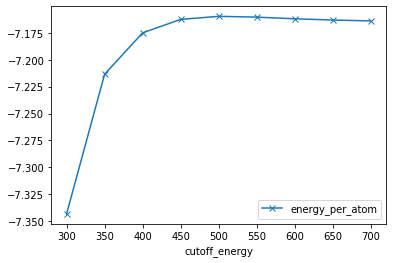

In [20]:
cdf.plot('cutoff_energy', 'energy_per_atom', marker='x')

<AxesSubplot:xlabel='cutoff_energy'>

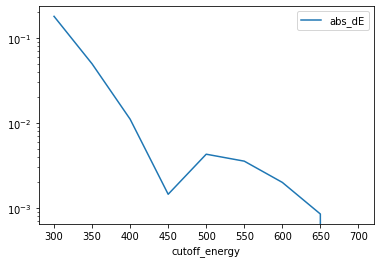

In [21]:
cdf.plot('cutoff_energy', 'abs_dE', logy=True)

<AxesSubplot:xlabel='cutoff_energy'>

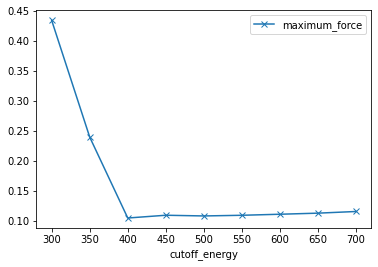

In [22]:
cdf.plot('cutoff_energy', 'maximum_force', marker='x')

<AxesSubplot:xlabel='cutoff_energy'>

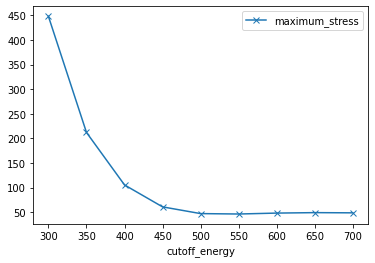

In [23]:
cdf.plot('cutoff_energy', 'maximum_stress', marker='x')

In [24]:
kdf

,mesh,energy,cutoff_energy,maximum_force,maximum_stress,kpoints_spacing,energy_per_atom,dE_per_atom
0,"[4, 2, 3]",-200.547416,450.0,0.109609,61.076885,0.07,-7.162408,0.000022
1,"[4, 2, 3]",-200.547416,450.0,0.109609,61.076885,0.06,-7.162408,0.000022
2,"[5, 2, 4]",-200.547185,450.0,0.109530,60.972700,0.05,-7.162399,0.000030
3,"[6, 3, 5]",-200.548403,450.0,0.109653,61.029623,0.04,-7.162443,-0.000013
4,"[8, 4, 6]",-200.548470,450.0,0.109194,61.017755,0.03,-7.162445,-0.000016
5,"[11, 5, 9]",-200.548030,450.0,0.109458,61.076987,0.02,-7.162430,0.000000


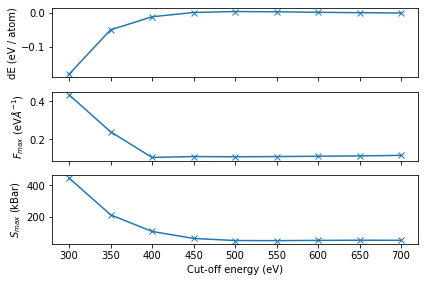

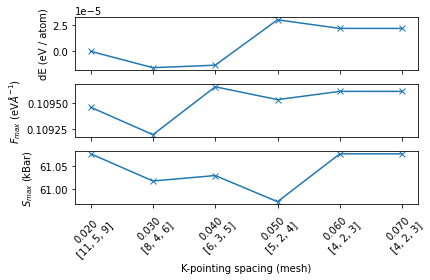

In [25]:
fig1, fig2 = plot_conv_data(cdf, kdf)

In [45]:
!verdi archive create -G li-metal-refs {base.path} -- lfp-examples.aiida

Report: 
Archive Parameters
--------------------  ------------------
Path                  lfp-examples.aiida
Version               main_0001
Compression           6

Inclusion rules
----------------------------  --------
Computers/Nodes/Groups/Users  Selected
Computer Authinfos            False
Node Comments                 True
Node Logs                     True

Traversal rules
---------------------------------  -----
Follow links input calc forwards   False
Follow links input calc backwards  True
Follow links create forwards       True
Follow links create backwards      True
Follow links return forwards       True
Follow links return backwards      False
Follow links input work forwards   False
Follow links input work backwards  True
Follow links call calc forwards    True
Follow links call calc backwards   True
Follow links call work forwards    True
Follow links call work backwards   True

Report: Validating Nodes                                           
Report: Creating archiv